In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python

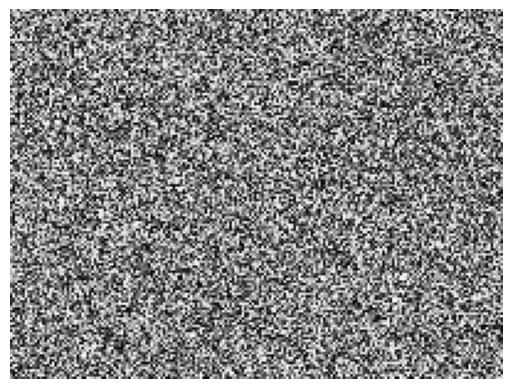

In [3]:
# Set the width and height of the images
width = 200
height = 150

# Calculate the total number of pixels
total_pixels = width * height

# Generate random noise color image
color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Generate random noise grayscale image
grayscale_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Display the color image
cv2.imshow('Color Image', color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import cv2

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # Get the height and width of the image
    height, width, _ = img.shape

    # Calculate the height and width of each patch
    patch_height = height // num_vertical_grid
    patch_width = width // num_horizontal_grid

    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * patch_width
        cv2.line(img, (x, 0), (x, height), line_color, 2)

    # Draw horizontal grid lines
    for j in range(1, num_vertical_grid):
        y = j * patch_height
        cv2.line(img, (0, y), (width, y), line_color, 2)

    return img

# Load the image
img = cv2.imread('dog.jfif')

# Define the number of patches along x and y axes
num_horizontal_grid = 4
num_vertical_grid = 4

# Define the color of the grid lines (BGR format)
line_color = (0, 255, 0)  # Green color (you can change this to your desired color)

# Call the function to create an image with grids
img_with_grids = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

# Display the output image with grids
cv2.imshow('Image with Grids', img_with_grids)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

def blend_images(img1, img2, alpha):
    return cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

# Load the base images
img1 = cv2.imread('lena.jfif')
img2 = cv2.imread('coins.jfif')

# Resize the images to the same dimensions
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# Define the alpha values for blending
alpha_values = [x/100 for x in range(101)]  # From 0 to 1 with a step of 0.01

# Display the image sequence of smooth transitions
for alpha in alpha_values:
    blended_image = blend_images(img1, img2, alpha)
    cv2.imshow('Blended Image', blended_image)
    cv2.waitKey(50)  # Display each frame for 50 milliseconds
    if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' key to stop the loop
        break

cv2.destroyAllWindows()

In [ ]:
import cv2

def add_watermark(image_path, output_path):
    # Load the original image
    image = cv2.imread(image_path)

    # Define the watermark text and font properties
    watermark_text = "week 4 exercise"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 2.0
    font_thickness = 2
    font_color = (255, 0, 0)  
    # Get the size of the watermark text
    (text_width, text_height), _ = cv2.getTextSize(watermark_text, font, font_scale, font_thickness)

    # Define the position to place the watermark 
    padding = 20
    x_offset = padding
    y_offset = image.shape[0] - text_height - padding

    # Add the watermark text to the original image
    cv2.putText(image, watermark_text, (x_offset, y_offset), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    # Save the watermarked image
    cv2.imwrite(output_path, image)

    # Display the watermarked image 
    cv2.imshow("Watermarked Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Path to the original image and output watermarked image
image_path = "travel_hd.jpg"
output_path = "watermarked_travel_hd.jpg"

# Add the watermark and save the watermarked image
add_watermark(image_path, output_path)